In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import os
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
os.chdir("/densepose")
coco_folder = 'detectron/datasets/data/coco/'

In [9]:
dataDir='detectron/datasets/data/coco'
dataType='train2017'

annFile='{}/annotations/body_coco_2014_valminusminival.json'.format(dataDir)
# annFile='{}/annotations/body_coco_2014_train.json'.format(dataDir)

In [10]:
# Initialize COCO api for instance annotations
coco=COCO(annFile)

# Display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

loading annotations into memory...
Done (t=5.66s)
creating index...
index created!
COCO categories: 
LowerLegLeft LowerArmRight UpperArmLeft LeftFoot Person UpperLegRight LeftHand RightFoot Head RightHand Torso UpperArmRight LowerLegRight UpperLegLeft LowerArmLeft

COCO supercategories: 
body


In [19]:
# Get all images containing given categories
catIds = coco.getCatIds(catNms=['Torso', "Head", "LowerArmLeft", "Person", "RightHand"]);
imgIds = coco.getImgIds(catIds=catIds );

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

img["file_name"] = img["file_name"].split("_")[-1]
img

{u'license': 1, u'file_name': u'COCO_val2014_000000524702.jpg', u'coco_url': u'http://mscoco.org/images/524702', u'height': 427, u'width': 640, u'date_captured': u'2013-11-21 20:28:48', u'flickr_url': u'http://farm6.staticflickr.com/5220/5442785338_a7c09f9f0e_z.jpg', u'id': 524702}


{u'coco_url': u'http://mscoco.org/images/524702',
 u'date_captured': u'2013-11-21 20:28:48',
 u'file_name': u'000000524702.jpg',
 u'flickr_url': u'http://farm6.staticflickr.com/5220/5442785338_a7c09f9f0e_z.jpg',
 u'height': 427,
 u'id': 524702,
 u'license': 1,
 u'width': 640}

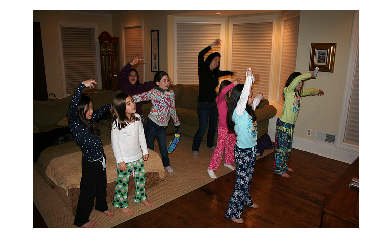

In [20]:
# Load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

(427, 640, 3)


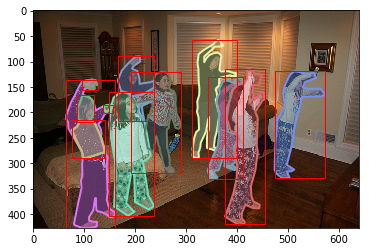

In [21]:
# Load and display instance annotations

# Create figure and axes
fig, ax = plt.subplots(1)

ax.imshow(I)

print(I.shape)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=False)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

# Create a Rectangle patch
for ann in anns:
    x1, y1, w, h = ann["bbox"]
    rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

In [14]:
anns

[{u'area': 11592.5077,
  u'bbox': [155.33, 275.27, 115.05, 218.61],
  u'category_id': 14,
  u'has_dp_masks': True,
  u'id': 60122,
  u'image_id': 198645,
  u'iscrowd': 0,
  u'segmentation': [[241.62,
    493.88,
    224.36,
    482.37,
    218.61,
    465.11,
    212.85,
    436.35,
    212.85,
    427.72,
    178.34,
    421.97,
    165.39,
    409.02,
    165.39,
    393.2,
    166.83,
    380.26,
    161.08,
    370.19,
    155.33,
    351.5,
    156.76,
    334.24,
    163.96,
    321.29,
    189.84,
    309.79,
    186.97,
    289.65,
    192.72,
    281.02,
    201.35,
    275.27,
    209.98,
    276.71,
    218.61,
    288.22,
    220.04,
    301.16,
    250.25,
    351.5,
    241.62,
    368.76,
    231.55,
    365.88,
    225.8,
    367.32,
    224.36,
    380.26,
    244.49,
    368.76,
    264.63,
    368.76,
    270.38,
    378.82,
    261.75,
    388.89,
    248.81,
    400.4,
    241.62,
    410.46,
    241.62,
    414.78,
    240.18,
    420.53,
    232.99,
    420.53,
 

In [15]:
anns[0]["segmentation"]

[[241.62,
  493.88,
  224.36,
  482.37,
  218.61,
  465.11,
  212.85,
  436.35,
  212.85,
  427.72,
  178.34,
  421.97,
  165.39,
  409.02,
  165.39,
  393.2,
  166.83,
  380.26,
  161.08,
  370.19,
  155.33,
  351.5,
  156.76,
  334.24,
  163.96,
  321.29,
  189.84,
  309.79,
  186.97,
  289.65,
  192.72,
  281.02,
  201.35,
  275.27,
  209.98,
  276.71,
  218.61,
  288.22,
  220.04,
  301.16,
  250.25,
  351.5,
  241.62,
  368.76,
  231.55,
  365.88,
  225.8,
  367.32,
  224.36,
  380.26,
  244.49,
  368.76,
  264.63,
  368.76,
  270.38,
  378.82,
  261.75,
  388.89,
  248.81,
  400.4,
  241.62,
  410.46,
  241.62,
  414.78,
  240.18,
  420.53,
  232.99,
  420.53,
  232.99,
  460.8,
  241.62,
  475.18,
  256,
  485.25,
  256,
  492.44,
  245.93,
  492.44,
  238.74,
  489.56]]